In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
import imghdr
%matplotlib inline


In [2]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    IMG_DIR = 'images/'
    if imghdr.what(IMG_DIR + IMG_NAME) == 'bmp':
      img = cv2.imread(IMG_DIR + IMG_NAME,0)
    else :
      img = cv2.imread(IMG_DIR + IMG_NAME,1)
    return img


In [3]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    ### YOUR CODE HERE ###
    mosaic_shape = np.shape(mosaic_img)
#     print(mosaic_shape[0],mosaic_shape[1])
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    blue = soln_image[:,:,0]
    green = soln_image[:,:,1]
    red = soln_image[:,:,2]    

    mosaic_img = mosaic_img.astype(np.float64)
    blue = mosaic_img.copy()
    blue[::2,:] = 0
    blue[:,::2] = 0
#     print("Blue:\n",blue)
    green = mosaic_img.copy()
    green[::2,::2] = 0
    green[1::2,1::2] = 0
#     print("Green:\n",green)
    red = mosaic_img.copy()
    red[1::2,:] = 0
    red[:,1::2] = 0
#     print("Red:\n",red)
    
    from scipy import ndimage    
    k1 = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
    r = ndimage.convolve(red, k1, mode='mirror')
    b = ndimage.convolve(blue, k1, mode='mirror')
    k2 = np.array([[0,0.25,0],[0.25,1,0.25],[0,0.25,0]])
    g = ndimage.convolve(green, k2, mode='constant', cval=0.0)
#     g = ndimage.convolve(green, k2, mode='mirror')

    soln_image[:,:,0] = r
    soln_image[:,:,1] = g
    soln_image[:,:,2] = b
    np.clip(soln_image, 0, 255)
#     print(soln_image) 
    soln_image = soln_image.astype(np.uint8)
    return soln_image

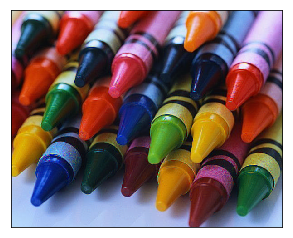

In [4]:
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_NAME)
# YOUR CODE HERE
soln_image = get_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [5]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
#     A = np.zeros((soln_image.shape[0], soln_image.shape[1], 3))
#     A = soln_image.astype(np.float64)
#     B = np.zeros((soln_image.shape[0], soln_image.shape[1], 3))
#     B = original_image.astype(np.float64)
#     target = A[:,:,:3] - B[:,:,:3]
#     squares = (A[:,:,:3] - B[:,:,:3]) ** 2
#     pp_err = np.sum(squares) / (3*600*480)
#     max_err = max(abs(np.max(target)),abs(np.min(target)))   
    
    error = np.absolute(original_image-soln_image)
    pp_err = np.mean(error)
    max_err = np.std(error)
    # print(target,pp_err,max_err)
    # Show the error image
    error_map = (error ** 2).sum(axis=2)
    plt.imshow(error_map / max_err, cmap='gray')
    plt.show()
    return pp_err, max_err

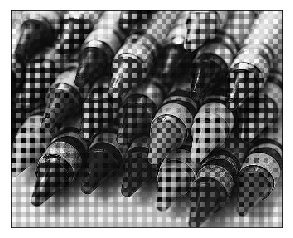

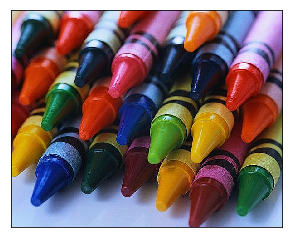

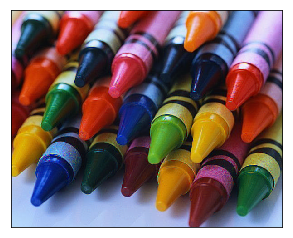

In [6]:
mosaic_img = read_image('crayons.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
original_image = read_image('crayons.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# For sanity check display your solution image here
### YOUR CODE
soln_image = get_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

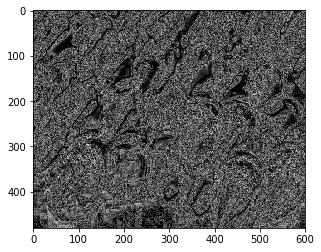

The average per-pixel error for crayons is: 98.55387268518518
The maximum per-pixel error for crayons is: 94.23556249599986


In [7]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

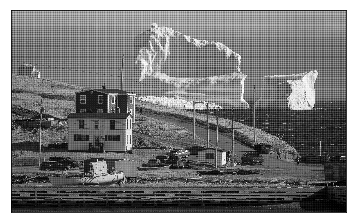

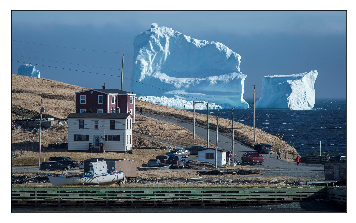

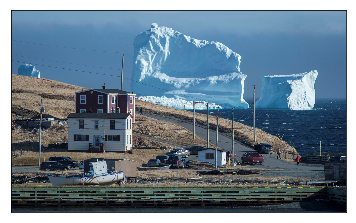

In [8]:
mosaic_img = read_image('iceberg.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
original_image = read_image('iceberg.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# For sanity check display your solution image here
### YOUR CODE
soln_image = get_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

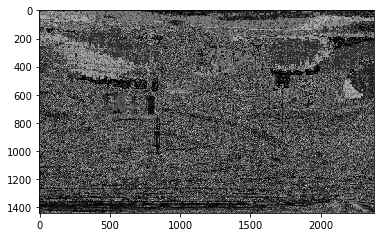

The average per-pixel error for iceberg is: 100.50491436545698
The maximum per-pixel error for iceberg is: 97.2682309159478


In [9]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

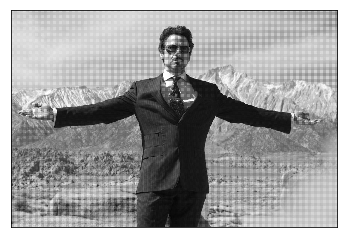

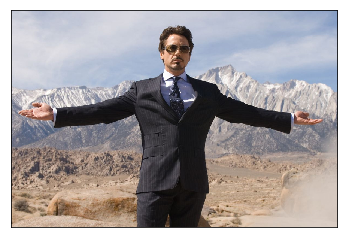

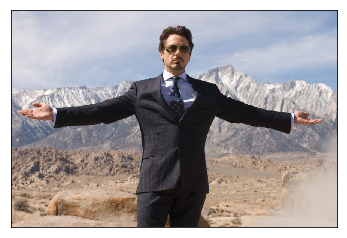

In [10]:
mosaic_img = read_image('tony.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
original_image = read_image('tony.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# For sanity check display your solution image here
### YOUR CODE
soln_image = get_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

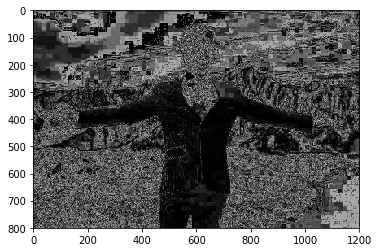

The average per-pixel error for tony is: 93.50639027777778
The maximum per-pixel error for tony is: 107.93315783004013


In [11]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

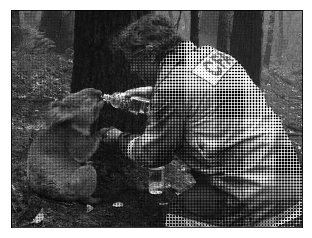

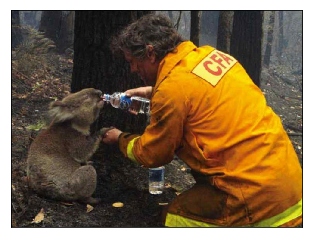

In [12]:
mosaic_img = read_image('hope.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
soln_image = get_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [13]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
#     b = freeman_soln_image[:,:,0]
#     g = freeman_soln_image[:,:,1]
#     r = freeman_soln_image[:,:,2] 
#     temp_img = temp_img.astype(np.float64)
#     b= temp_img.copy()
#     b[::2,:] = 0
#     b[:,::2] = 0
# #     print("Blue:\n",b)
#     G = temp_img.copy()
#     G[::2,::2] = 0
#     G[1::2,1::2] = 0
# #     print("Green:\n",g)
#     r = temp_img.copy()
#     r[1::2,:] = 0
#     r[:,1::2] = 0
# #     print("Red:\n",r)
    mosaic_shape = np.shape(mosaic_img)
    freeman_soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    temp_image = get_solution_image(mosaic_img)
    b = temp_image[:,:,0]
    G = temp_image[:,:,1]
    r = temp_image[:,:,2]    
    from scipy.signal import medfilt2d
    R = medfilt2d(r-G)+G
    B = medfilt2d(b-G)+G
    freeman_soln_image[:,:,0] = R
    freeman_soln_image[:,:,1] = G
    freeman_soln_image[:,:,2] = B
    np.clip(freeman_soln_image, 0, 255)
    freeman_soln_image = freeman_soln_image.astype(np.uint8)
    return freeman_soln_image

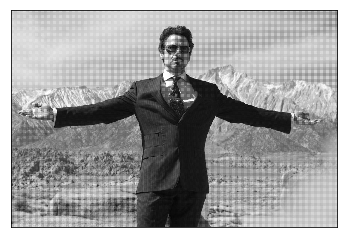

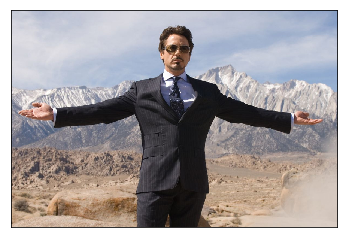

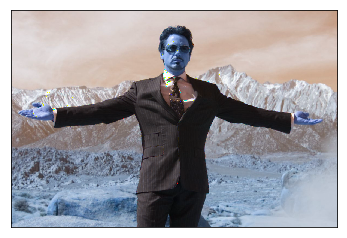

In [14]:
mosaic_img = read_image('tony.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
original_image = read_image('tony.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# For sanity check display your solution image here
### YOUR CODE
soln_image = get_freeman_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

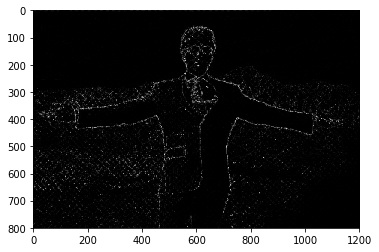

The average per-pixel error for tony is: 49.18474722222222
The maximum per-pixel error for tony is: 99.29949578725345


In [15]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [16]:
### Feel free to play around with other images for Freeman's method above ###

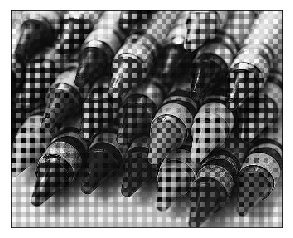

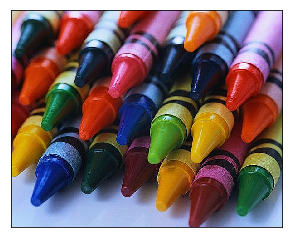

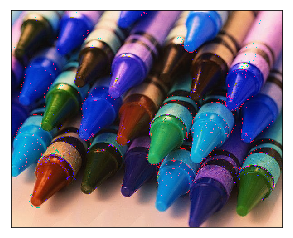

In [17]:
mosaic_img = read_image('crayons.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
original_image = read_image('crayons.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# For sanity check display your solution image here
### YOUR CODE
soln_image = get_freeman_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

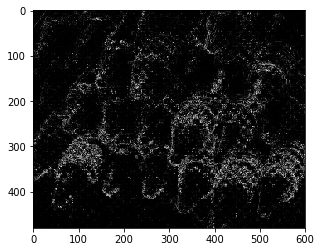

The average per-pixel error for crayons is: 72.15180208333334
The maximum per-pixel error for crayons is: 111.97364042226427


In [18]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

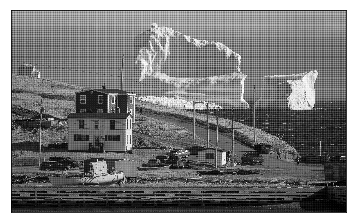

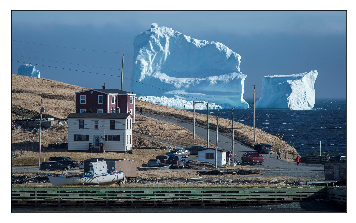

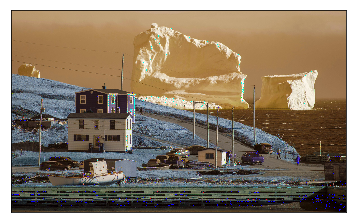

In [19]:
mosaic_img = read_image('iceberg.bmp')
plt.imshow(mosaic_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
original_image = read_image('iceberg.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# For sanity check display your solution image here
### YOUR CODE
soln_image = get_freeman_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

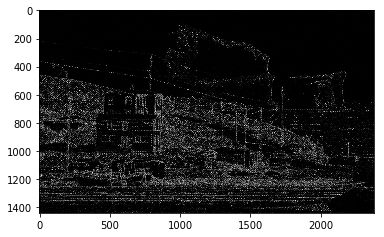

The average per-pixel error for iceberg is: 63.144582050564416
The maximum per-pixel error for iceberg is: 107.31954378498835


In [20]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

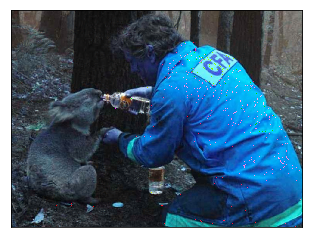

In [21]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [22]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
#     green[::2,::2] = 0
#     green[1::2,1::2] = 0
#     red[1::2,:] = 0
#     red[:,1::2] = 0
#     original_image = original_image.convert("RGB")
#     print(original_shape)
    original_image = np.array(original_image)
    original_image = np.asarray(original_image, dtype=np.float64)
    original_shape = np.shape(original_image)
    mosaic_img = np.zeros((original_shape[0], original_shape[1]))
    mosaic_img[::2,:] = original_image[::2,:,0]
    mosaic_img[:,::2] = original_image[:,::2,0]
    mosaic_img[::2,::2] = original_image[::2,::2,1]
    mosaic_img[1::2,1::2] = original_image[1::2,1::2,1]
    mosaic_img[1::2,:] = original_image[1::2,:,2]
    mosaic_img[:,1::2] = original_image[:,1::2,2]
    mosaic_img = mosaic_img.astype(np.uint8)
    return mosaic_img

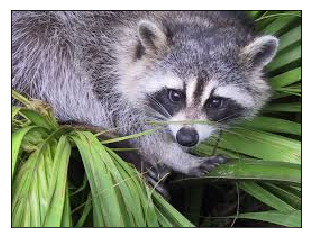

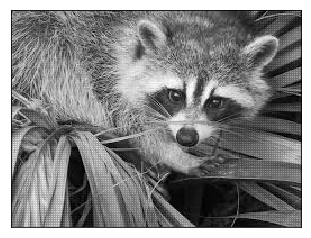

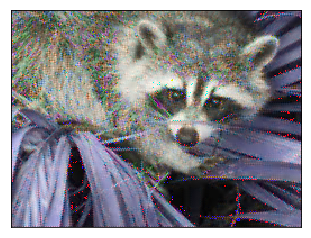

In [23]:
### YOUR CODE HERE ###
original_image= read_image('palm_bear.jpg')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
mosaic_img = get_mosaic_image(original_image)
plt.imshow(mosaic_img,cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# cv2.imwrite('palm_bear.bmp',mosaic_img)
# mosaic_img = read_image('palm_bear.bmp')

# For sanity check display your solution image here
### YOUR CODE
soln_image = get_freeman_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

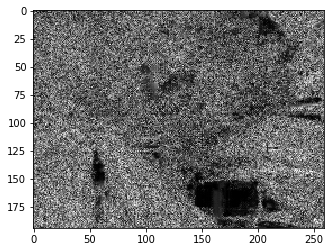

The average per-pixel error for bear is: 136.54683623240325
The maximum per-pixel error for bear is: 107.16041669433402


In [24]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for bear is: "+str(pp_err))
print("The maximum per-pixel error for bear is: "+str(max_err))

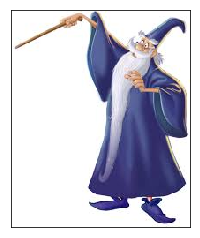

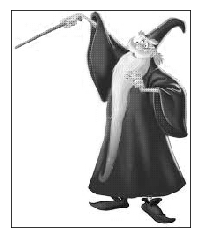

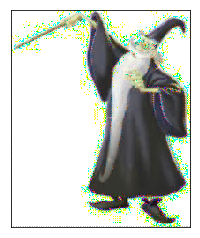

In [25]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####
original_image= read_image('wizard.png')
plt.imshow(original_image[:,:,::-1])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
mosaic_img = get_mosaic_image(original_image)
plt.imshow(mosaic_img,cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# Generate your solution image here and show it
soln_image = get_freeman_solution_image(mosaic_img)
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

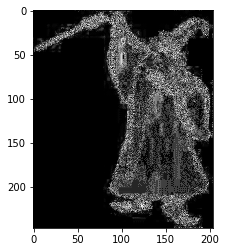

The average per-pixel error for wizard is: 59.585073165568524
The maximum per-pixel error for wizard is: 96.77009796399219


In [26]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for wizard is: "+str(pp_err))
print("The maximum per-pixel error for wizard is: "+str(max_err))